# Predict Host Professional Status
In this section, I attempt to predict whether a host is a professional or not.  Note that a host is considered professional if they list more than one unit on Airbnb, as justified by [previous literature](https://pdfs.semanticscholar.org/9cb2/e1ad853d8cec5cb2ccd6eb3df951aa2733ac.pdf?_ga=2.138786736.2078325923.1544210414-456397272.1544210414).

Logistic regression, a decision tree, and AdaBoost are all used to classfiy host status. 

## Import packages and load data

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [2]:
# import data
dir = str(Path().resolve())
df = pd.read_csv(dir + "/../data/listings.csv")

## Prepare data

In [3]:
# split into X and y
X = df.drop('is_professional', axis=1)
y = df['is_professional']

# drop host listing count
X = X.drop(['calculated_host_listings_count', 'host_total_listings_count', 'host_listings_count'], axis=1)

# get dummies
X = pd.get_dummies(X)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y)

## Train models

In [4]:
# train models
print("Training logistic regression...")
log = LogisticRegression().fit(X_train, y_train)
print("Training decision tree...")
dec = DecisionTreeClassifier().fit(X_train, y_train)
print("Training AdaBoost...")
ada = AdaBoostClassifier(n_estimators=50).fit(X_train, y_train)
print("Done")

Training logistic regression...


/Users/cccdenhart/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training decision tree...
Training AdaBoost...
Done


In [5]:
# get predictions
print("Getting predictions...")
log_pred = log.predict(X_test)
dec_pred = dec.predict(X_test)
ada_pred = ada.predict(X_test)
# add in adaboost
print("Done")

Getting predictions...
Done


## View results

In [6]:
# display performance metrics
print("Logistic Regression Results:")
print("accuracy: " + str(accuracy_score(y_test, log_pred)))
print("precision: " + str(precision_score(y_test, log_pred)))
print("recall: " + str(recall_score(y_test, log_pred)))
print("auc: " + str(roc_auc_score(y_test, log_pred)))
print()
print("Decision Tree Results:")
print("accuracy: " + str(accuracy_score(y_test, dec_pred)))
print("precision: " + str(precision_score(y_test, dec_pred)))
print("recall: " + str(recall_score(y_test, dec_pred)))
print("auc: " + str(roc_auc_score(y_test, dec_pred)))
print()
print("AdaBoost Results:")
print("accuracy: " + str(accuracy_score(y_test, ada_pred)))
print("precision: " + str(precision_score(y_test, ada_pred)))
print("recall: " + str(recall_score(y_test, ada_pred)))
print("auc: " + str(roc_auc_score(y_test, ada_pred)))

Logistic Regression Results:
accuracy: 0.7376577728071577
precision: 0.7376577728071577
recall: 1.0
auc: 0.5

Decision Tree Results:
accuracy: 0.9012621824572615
precision: 0.9277005347593583
recall: 0.9393545592376001
auc: 0.8667540153069851

AdaBoost Results:
accuracy: 0.8041220642275124
precision: 0.8370105346849533
recall: 0.9120641108945202
auc: 0.7063365621464075


## Discussion

### Why are Logistic Reg results odd?
* All prediction probabilities are > .5

/Users/cccdenhart/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


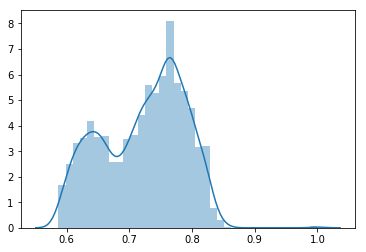

In [41]:
probs = list(map(lambda x: x[1], log.predict_proba(X_test)))
sns.distplot(probs)